<a href="https://colab.research.google.com/github/Koush98/Weather-Forecasting-TimeSeries-Analysis/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Forecasting**

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')


In [2]:
# importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Koush98/Weather-Forecasting-TimeSeries-Analysis/main/DailyDelhiClimate.csv')
print(df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [3]:
# Descriptive statistics
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [4]:
# checking the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


In [5]:
# Plotting the mean temparature in Delhi over the years
figure = px.line(df, x='date', y='meantemp', title='Mean Temperature in Delhi')
figure.show()

In [6]:
# Checking humidity over the years
figure1 = px.line(df, x ='date', y='humidity', title = 'Humidity in Delhi over the years')
figure1.show()

In [7]:
# Checking Wind Speed over the years in Delhi
figure2 = px.line(df, x ='date', y='wind_speed', title = 'Wind_speed in Delhi over the years')
figure2.show()

Till 2015, the wind speed was higher during monsoons (August & September) and retreating monsoons(December & January). After 2015, there were no anomalies in wind speed during monsoons.

In [8]:
# Relation between temparature and humidity
figure3 = px.scatter(df, x='meantemp', y='humidity',trendline='ols', title='Mean Temperature vs Humidity')
figure3.show()

There's a negative correlation between temparature and humidity in Delhi. It means higher temparature results in low humidity and lower temparature results in high humidity.

## Analyzing Temparature Change
For this, I will first convert the data type of the date column into datetime. Then I will add two new columns in the dataset for yeara and month values.

In [9]:
# Changing Date column into datetime format
df['date'] = pd.to_datetime(df['date'])
df['year'] =df['date'].dt.year
df['month'] =df['date'].dt.month
df['day'] =df['date'].dt.day
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5


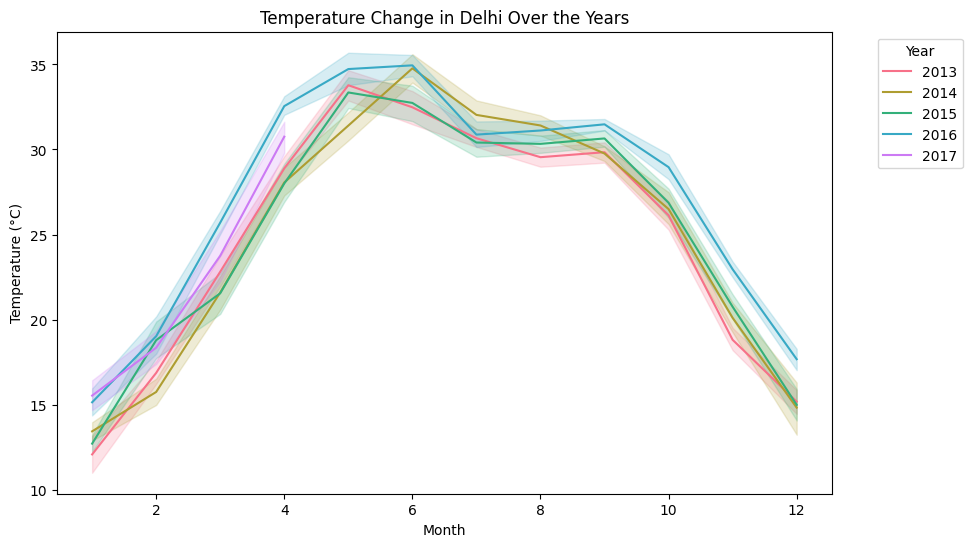

In [18]:
# checking the temarature change in delhi over the years
unique_years = df['year'].unique()
palette = sns.color_palette("husl", len(unique_years))

plt.figure(figsize=(10, 6))
plt.title('Temperature Change in Delhi Over the Years')

# Plotting the line plot
sns.lineplot(x='month', y='meantemp', hue='year', data=df, palette=palette)

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Although 2017 was not the hottest year in the summer, we can see a rise in the average temparature of Delhi every year.

In [ ]:
# forecasting weather
!pip install prophet

In [15]:
# The prophet model accepts time data named as "ds", and labels as "y". So let's convert the data into this format:
forecast_df = df.rename(columns = {'date':'ds', 'meantemp':'y'})
forecast_df

,ds,y,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5
...,...,...,...,...,...,...,...,...
1571,2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,20
1572,2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,21
1573,2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,22
1574,2017-04-23,32.875000,27.500000,9.962500,1002.125000,2017,4,23


In [17]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_df)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpskg4h4rn/apyd3_h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpskg4h4rn/rj607mkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24174', 'data', 'file=/tmp/tmpskg4h4rn/apyd3_h8.json', 'init=/tmp/tmpskg4h4rn/rj607mkx.json', 'output', 'file=/tmp/tmpskg4h4rn/prophet_model2bjga2wy/prophet_model-20240711050652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:06:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Now we can analyze and forecast the weather.

# **Summary**
Weather forecasting is the task of forecasting weather conditions for agiven location and time. With the use of weather data and algorithms, it is possible to predict weather conditions for the next n number of days.
